<a href="https://colab.research.google.com/github/Sruthij93/Customer_Churn_WebApp/blob/main/Customer_Churn_Predict_Proj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("churn.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Analyzing the DataFrame**

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
sns.set_style(style="whitegrid")
plt.figure(figsize=(12,10))


<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

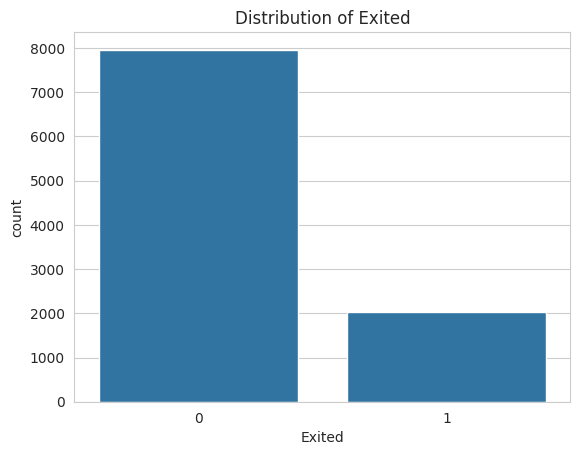

In [ ]:
sns.countplot(x="Exited",data=df)
plt.title("Distribution of Exited")
plt.show()
# 8000 around didnt churn and 2000 did churn. There is an imbalance, we will need to use oversampling or undersampling to adjust.

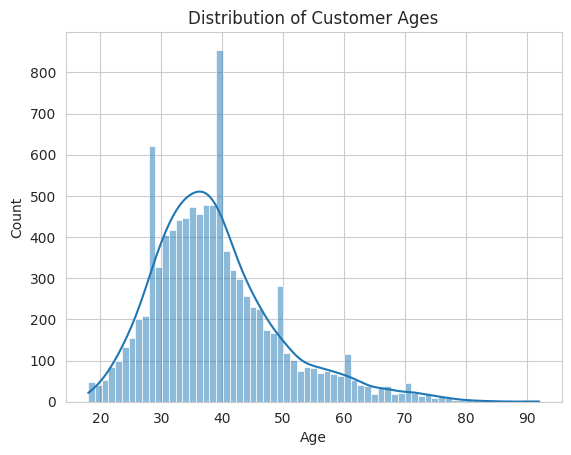

In [ ]:
# Histogram of customer ages- age distribution of the customers
# kde = kernel density estimate
sns.histplot(data= df, x="Age", kde=True)
plt.title("Distribution of Customer Ages")
plt.show()

# a majority of the customers are between 30 to 50 years with peak at 40 yrs old. 50 and 60 also peaks are there.

Text(0.5, 1.0, 'Credit Score vs Age')

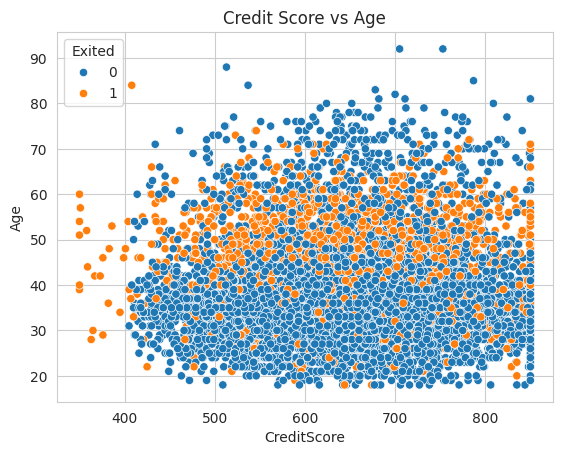

In [ ]:
# scatterplot of credit score of customers vs age, colored by whether customer chhurned or not
# hue = color whether they churned or not
sns.scatterplot(data= df, x= "CreditScore", y="Age", hue="Exited")
plt.title("Credit Score vs Age")

# higher concentration of orange dots (churned) at older ages. older aged customer likely to churn

Text(0.5, 1.0, 'Balance distribution')

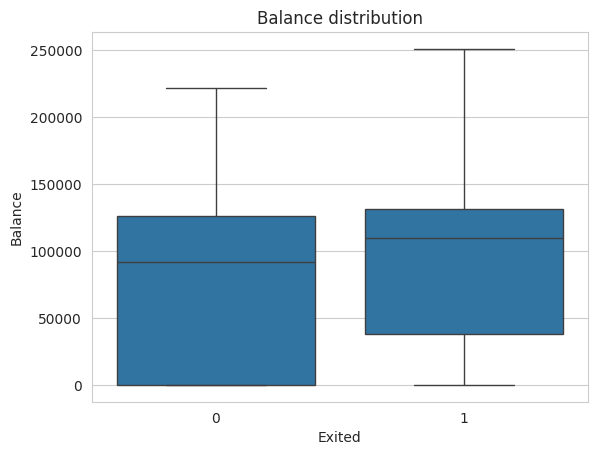

In [ ]:
# diff between account balances between churned and not churned customers
sns.boxplot(data= df, x="Exited", y="Balance")
plt.title("Balance distribution")
# customers who have churned have higher acc balances on avg. Median (line), top of box- 75th percentile, top whisker is the max.
# high value of customer are at higher risk at leaving

Text(0.5, 1.0, 'Credit Score distribution by Churn')

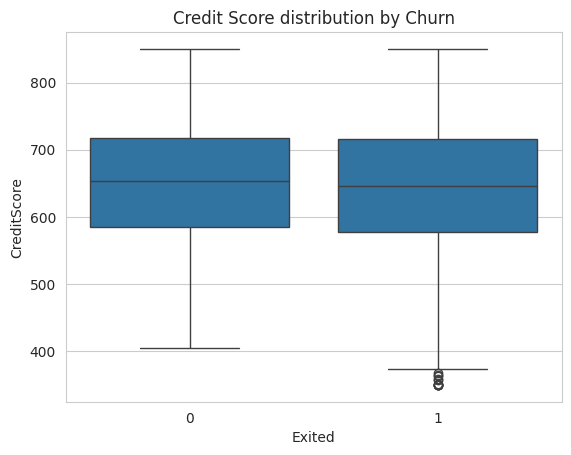

In [ ]:
# comparison of credit score
sns.boxplot(data= df, x="Exited", y="CreditScore")
plt.title("Credit Score distribution by Churn")

# pretty much the same.
# not churned customers have higher median credit score

# **Preprocessing the Data**

In [ ]:
features = df.drop(["Exited"], axis = 1)
features.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
target = df["Exited"]

In [ ]:
# rownumber,  customerid and surname not needed
features = features.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
#  drop missing values
features = features.dropna()

In [ ]:
features
# no missing values

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
# convert categorical variables to numerical format. using one hot encoding
features = pd.get_dummies(features, columns=["Geography", "Gender"])

In [ ]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

with open('scaler.pkl', 'wb') as file:
 pickle.dump(scaler, file)

In [ ]:
X_train
# we are scaling the features, so they can contribute to the target equally

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ...,  1.73494238,
        -0.91324755,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57638802,
         1.09499335, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ..., -0.57638802,
        -0.91324755,  0.91324755]])

# **Train ML Models**


In [ ]:
# Logistics Regression, for binary classification
from sklearn.linear_model import LogisticRegression
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [ ]:
lr_model = LogisticRegression(random_state = 42)
lr_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [ ]:
lr_predictions = lr_model.predict(X_test)

In [ ]:
lr_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
lr_accuracy = accuracy_score(y_test, lr_predictions)

In [ ]:
lr_accuracy

0.811

In [ ]:
def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, filename):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-------------")
    print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")
    print(f"\nClassfication Report: \n{classification_report(y_test, y_pred)}")
    print("-------------")

    # use pickle library to save the model
    # wb: opens the file in binary mode so that we can dump the model's data in here
    with open(filename, 'wb') as file:
      pickle.dump(model, file)

    print(f"Model saved as {filename}")


In [ ]:
# XGBoost model
xgb_model = xgb.XGBClassifier(random_state = 42)
evaluate_and_save_model(xgb_model, X_train, X_test, y_train, y_test, 'xgb_model.pkl')

# Decision Tree
dt_model = DecisionTreeClassifier(random_state = 42)
evaluate_and_save_model(dt_model, X_train, X_test, y_train, y_test, 'dt_model.pkl')

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state = 42)
evaluate_and_save_model(rf_model, X_train, X_test, y_train, y_test, 'rf_model.pkl')

# Naive Bayes Model
nb_model = GaussianNB()
evaluate_and_save_model(nb_model, X_train, X_test, y_train, y_test, 'nb_model.pkl')

#KNN model
knn_model = KNeighborsClassifier()
evaluate_and_save_model(knn_model, X_train, X_test, y_train, y_test, 'knn_model.pkl')

#SVC model
svm_model = SVC(random_state = 42)
evaluate_and_save_model(svm_model, X_train, X_test, y_train, y_test, 'svm_model.pkl')

-------------
XGBClassifier Accuracy: 0.8625

Classfication Report: 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

-------------
-------------
DecisionTreeClassifier Accuracy: 0.7805

Classfication Report: 
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.51      0.48       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.79      2000

-------------
-------------
RandomForestClassifier Accuracy: 0.8635

Classfication Report: 
              precision    recall  f1-score   support

           0       0.88      0.96     

In [ ]:
# Find which features are most helpful to predict customer churn
# get feature names
feature_importances = xgb_model.feature_importances_
feature_names = features.columns


In [ ]:
feature_importances

array([0.03500515, 0.10955004, 0.03005428, 0.05278617, 0.32388842,
       0.03194036, 0.16414644, 0.03265523, 0.04646328, 0.09137332,
       0.0368547 , 0.04528258, 0.        ], dtype=float32)

In [ ]:
feature_names

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [ ]:
# dataframe that stores both the above info
feature_importances_df = pd.DataFrame(
    {'feature': feature_names,
     'importance': feature_importances}
)

In [ ]:
feature_importances_df

,feature,importance
0,CreditScore,0.035005
1,Age,0.109550
2,Tenure,0.030054
3,Balance,0.052786
4,NumOfProducts,0.323888
5,HasCrCard,0.031940
6,IsActiveMember,0.164146
7,EstimatedSalary,0.032655
8,Geography_France,0.046463
9,Geography_Germany,0.091373


In [ ]:
# sort the feature importances in the df
feature_importances_df = feature_importances_df.sort_values(by="importance", ascending = False)
feature_importances_df

# NumofProducts, IsActiveMember and age are most important

,feature,importance
4,NumOfProducts,0.323888
6,IsActiveMember,0.164146
1,Age,0.109550
9,Geography_Germany,0.091373
3,Balance,0.052786
8,Geography_France,0.046463
11,Gender_Female,0.045283
10,Geography_Spain,0.036855
0,CreditScore,0.035005
7,EstimatedSalary,0.032655


Text(0.5, 1.0, 'Feature Importances')

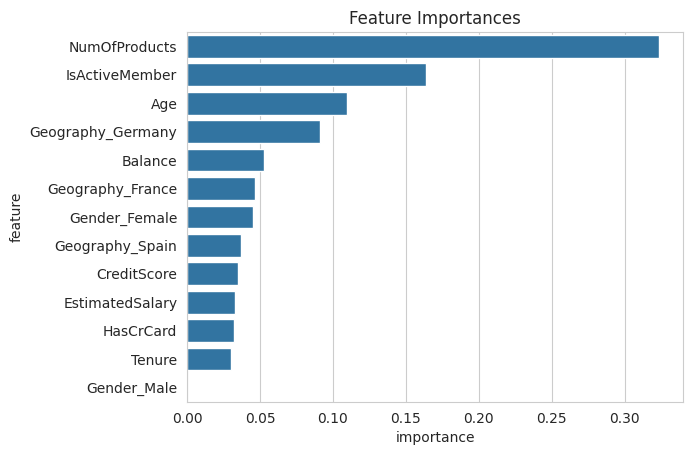

In [ ]:
# plot this
sns.barplot(x="importance", y="feature", data=feature_importances_df)
plt.title("Feature Importances")
#



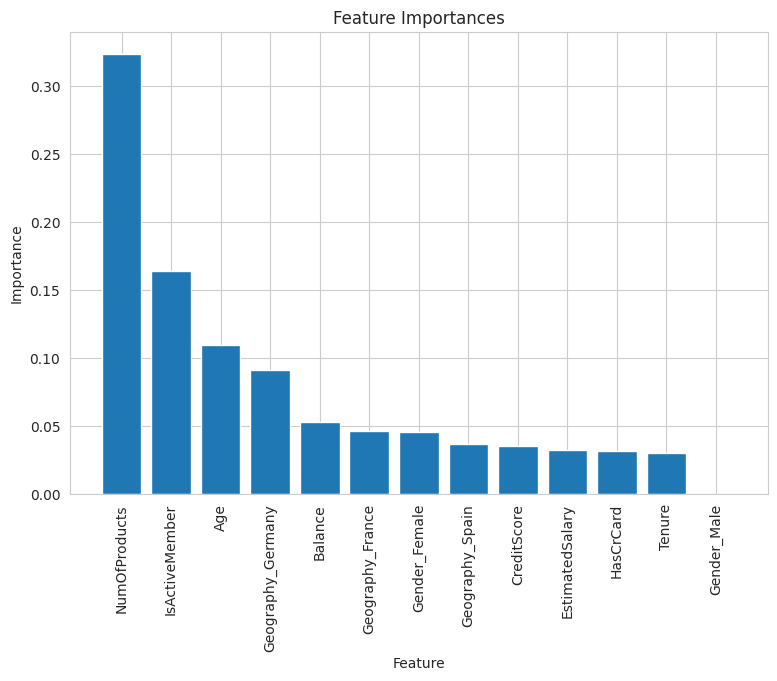

In [ ]:
plt.figure(figsize = (9,6))
plt.bar(feature_importances_df['feature'], feature_importances_df['importance'])
plt.xticks(rotation = 90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

# Improve the performance of models by Feature Engineering, SMOTE, Ensembling

In [ ]:
# Add new features
# Calculate the customer lifetime value
features['CLV'] = df['Balance'] * df['EstimatedSalary'] / 100000

In [ ]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344


In [ ]:
# define the age groups
features['AgeGroup'] = pd.cut(df['Age'], bins= [0, 30, 45, 60, 100], labels = ['Young', 'MiddleAge', 'Senior', 'Elderly'])

In [ ]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,AgeGroup
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,MiddleAge
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,MiddleAge
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,MiddleAge
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,MiddleAge
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,MiddleAge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,MiddleAge
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,MiddleAge
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,MiddleAge
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,MiddleAge


In [ ]:
# Tenure Age ratio: ratio of the customer tenure with the bank and their age
#  who are going to stay with the bank for a long time
features['TenureAgeRatio'] = df['Tenure'] / df['Age']

In [ ]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,AgeGroup,TenureAgeRatio
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,MiddleAge,0.047619
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,MiddleAge,0.024390
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,MiddleAge,0.190476
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,MiddleAge,0.025641
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,MiddleAge,0.046512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,MiddleAge,0.128205
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,MiddleAge,0.285714
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,MiddleAge,0.194444
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,MiddleAge,0.071429


In [ ]:
# convert age group column to dummies
# drop_first = True avoids multi-colinearity, where the columns are high correlated.
features = pd.get_dummies(features, drop_first = True)

In [ ]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,TenureAgeRatio,AgeGroup_MiddleAge,AgeGroup_Senior,AgeGroup_Elderly
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,0.047619,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,0.024390,True,False,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,0.190476,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,0.025641,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,0.046512,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,0.128205,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,0.285714,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,0.194444,True,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,0.071429,True,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [ ]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,TenureAgeRatio,AgeGroup_MiddleAge,AgeGroup_Senior,AgeGroup_Elderly
9254,686,32,6,0.00,2,1,1,179093.26,True,False,False,False,True,0.000000,0.187500,True,False,False
1561,632,42,4,119624.60,2,1,1,195978.86,False,True,False,False,True,234438.927360,0.095238,True,False,False
1670,559,24,3,114739.92,1,1,0,85891.02,False,False,True,False,True,98551.287635,0.125000,False,False,False
6087,561,27,9,135637.00,1,1,0,153080.40,True,False,False,True,False,207633.662148,0.333333,False,False,False
6669,517,56,9,142147.32,1,0,0,39488.04,True,False,False,False,True,56131.190581,0.160714,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,True,False,False,False,True,48367.430996,0.148148,False,True,False
5191,682,58,1,0.00,1,1,1,706.50,True,False,False,True,False,0.000000,0.017241,False,True,False
5390,735,38,1,0.00,3,0,0,92220.12,True,False,False,True,False,0.000000,0.026316,True,False,False
860,667,43,8,190227.46,1,1,0,97508.04,True,False,False,False,True,185487.067788,0.186047,True,False,False


In [ ]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
# create a new instance of the xgb model and compare how it performs
xgboost_model = xgb.XGBClassifier(random_state = 42)
evaluate_and_save_model(xgboost_model, X_train, X_test, y_train, y_test, 'xgboost-featureEngineered_model.pkl')

-------------
XGBClassifier Accuracy: 0.8540

Classfication Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.67      0.50      0.58       393

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.85      2000

-------------


In [ ]:
# SMO: synthetic minority oversampling technique: creating new synthetic data for the minority data.
from imblearn.over_sampling import SMOTE


In [ ]:
# create an instance of the SMOTE class
smote = SMOTE(random_state = 42)


In [ ]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
#  train the xgboost model again on the new sampled data
evaluate_and_save_model(xgboost_model, X_resampled, X_test, y_resampled, y_test, 'xgboost-SMOTE_model.pkl')

-------------
XGBClassifier Accuracy: 0.8545

Classfication Report: 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.65      0.55      0.60       393

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.85      0.85      0.85      2000

-------------


In [ ]:
#  Ensembling: voting classfier, multiple models together adn then vote
from sklearn.ensemble import VotingClassifier

In [ ]:
# pass in the models to the instance of the votingclassifier
voting_clf = VotingClassifier(
    estimators = [('xgboost', xgb.XGBClassifier(random_state = 42)), ('rf', RandomForestClassifier(random_state = 42)), ('svm', SVC(random_state = 42, probability = True))],
    voting = 'soft'
)

# the soft voting means that the voting classifier will weight the predictions of the individual models by their accuracy
# hard voting means it will take the majority vote of the classifiers

In [ ]:
evaluate_and_save_model(voting_clf, X_resampled, X_test, y_resampled, y_test, 'voting_clf_model.pkl')

-------------
VotingClassifier Accuracy: 0.8615

Classfication Report: 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1607
           1       0.68      0.55      0.61       393

    accuracy                           0.86      2000
   macro avg       0.79      0.75      0.76      2000
weighted avg       0.85      0.86      0.86      2000

-------------


In [ ]:
# XGBoost model before Hyperparameter tuning
xgb_model = xgb.XGBClassifier(random_state = 42)
evaluate_and_save_model(xgb_model, X_train, X_test, y_train, y_test, 'xgb_model.pkl')

-------------
XGBClassifier Accuracy: 0.8540

Classfication Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.67      0.50      0.58       393

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.85      2000

-------------


In [ ]:
# prompt: Give me the python code to perform grid search to find the optimal hyper parameters for the XGBoost model

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'n_estimators': [100, 200, 300]
}

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',  # Use an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    n_jobs=-1  # Use all available CPU cores
)


# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of best XGBoost model on test set: {accuracy}")

Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 1.0}
Best score: 0.86425
Accuracy of best XGBoost model on test set: 0.8665


In [ ]:
# XGBoost model
xgb_model = xgb.XGBClassifier(random_state = 42, colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 3, min_child_weight= 5, n_estimators= 100, subsample= 1.0)
evaluate_and_save_model(xgb_model, X_train, X_test, y_train, y_test, 'xgb_model.pkl')


-------------
XGBClassifier Accuracy: 0.8665

Classfication Report: 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.48      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

-------------


# **Trying out more ML models**

In [ ]:
# Code to try other models: GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
gbc_model = GradientBoostingClassifier(random_state = 42, learning_rate = 0.09, max_depth = 5)
evaluate_and_save_model(gbc_model, X_train, X_test, y_train, y_test, 'gbc_model.pkl')

-------------
GradientBoostingClassifier Accuracy: 0.8680

Classfication Report: 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.74      0.51      0.60       393

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

-------------
Model saved as gbc_model.pkl


In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
stc_model = StackingClassifier(
    estimators = [('xgboost', xgb.XGBClassifier(random_state = 42)),
                  ('rf', RandomForestClassifier(random_state = 42)),
                  ('svm', SVC(random_state = 42, probability = True))],
    final_estimator = GradientBoostingClassifier(random_state = 42, learning_rate = 0.09, max_depth = 5)
)

evaluate_and_save_model(stc_model, X_train, X_test, y_train, y_test, 'stc_model.pkl')

-------------
StackingClassifier Accuracy: 0.8565

Classfication Report: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.71      0.46      0.56       393

    accuracy                           0.86      2000
   macro avg       0.79      0.71      0.73      2000
weighted avg       0.84      0.86      0.84      2000

-------------
Model saved as stc_model.pkl
